In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [2]:
# Load data from sklearn
iris = datasets.load_iris()
# Select features. iris data is a 4-column matrix. Here, the last two columns are selected.
X = iris.data[:, [2,3]]
# Get labels. iris.target is a 1D array.
y = iris.target
# There are 3 different labels
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [3]:
# Split the dataset into training and testing sets
# This is realized by 'train_test_split' from sklearn
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.3, random_state=1, stratify=y)
# test_size=0.3: 30% of the data belongs to the testing set.
# random_state=1: 'train_test_split' automatically shuffles the original data set before splitting it.
# By specifying the random_state, the shuffled data is the same for every run of the codes.
# This makes following result reproducible.
# stratify=y: this guarantees that both the training and testing sets have the same proportions of class labels.
# To verify this, we use np.bincount. It counts the number of occurences of each value in array of non-negative ints.
print("Label counts in y:", np.bincount(y))
print("Label counts in y_train:", np.bincount(y_train))
print("Label counts in y_test:", np.bincount(y_test))

Label counts in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_test: [15 15 15]


In [4]:
# Feature scaling
# Create an object of 'StandardScaler' class.
sc = StandardScaler()
# Get the mean and standard deviation of the training set.
sc.fit(X_train)
# Rescale the training set
X_train_std = sc.transform(X_train)
# Rescale the testing set
X_test_std = sc.transform(X_test)
# The rescaling formular is z = (x - u) / s

In [5]:
# Show what sc did
print("Mean of X_train:", sc.mean_)
print("Variance of X_train", sc.var_)
print("Scale/standard deviation of X_train:", sc.scale_)

Mean of X_train: [3.78952381 1.19714286]
Variance of X_train [3.21484263 0.58180136]
Scale/standard deviation of X_train: [1.79299822 0.76275904]


In [6]:
# Use the perceptron model from sklearn
# This perceptron has a built-in ovr utility that enable the perceptron to handle multiclassification.
ppn = Perceptron(eta0=0.1, random_state=1)
# The data is shuffled at each epoch. random_state=1 makes the following result reproducible.

# Train the model
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [7]:
# Prediction
y_pred = ppn.predict(X_test_std) # This returns a 1D array
print("Number of misclassifications: %d" % (y_test!=y_pred).sum())

# The accuracy of the model can also be measured by accuracy score, which is 1 - percent of misclassifications
# For the current result, percent of misclassifications = 1/45

print("Accuracy score:", accuracy_score(y_test, y_pred))

# Sklearn also has a function 'score' that combine 'predict' and 'accuracy_score'
print("Accuracy score:", ppn.score(X_test_std, y_test))

Number of misclassifications: 1
Accuracy score: 0.9777777777777777
Accuracy score: 0.9777777777777777


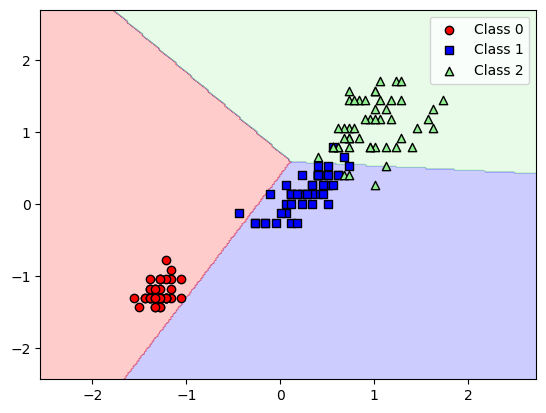

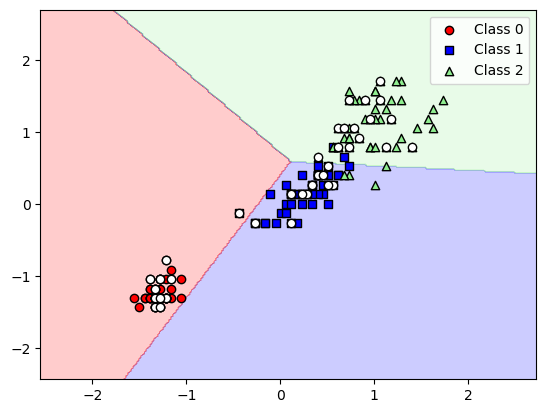

In [10]:
# Visualization
def plot_decision_regions(X, y, classifier, resolution=0.02, test_idx=None):
    # Create lists of markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # np.unique: find the unique elements of an array
    # The output y only has two possible values, 0 and 1. Therefore np.unique(y) is 2.
    # Then colors[:len(np.unique(y))] is colors[:2], i.e., colors = ('red', 'blue')
    # This is suitable for discrete colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Set the range 
    # The range of the figure is larger than the range of the features.
    # Prevent data points from lying on the edges of the figure.
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 
    # Generate meshgrid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # np.ravel(): flatten an array. It returns a 1D-array
    # The input of the function 'predict' is X. Each column of X corresponds to a feature.
    # Therefore, after raveling, we need to transpose the array.
    # lab: labels for all grid points
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # The output of 'predict' is a 1D-array. It is reshaped to have the same shape as xx1
    lab = lab.reshape(xx1.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # alpha: control the transparency
    ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
    
    # Plot training examples
    # enumerate: 
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=colors[idx], marker=markers[idx], label='Class {}'.format(cl), edgecolor="black")
    ax.legend()
    
    # Circle testing examples
    if test_idx:
        X_test = X[test_idx, :]
        ax.scatter(x=X_test[:,0], y=X_test[:,1], alpha=1, c='white', marker='o', label='Test set', edgecolor="black")
        # The original codes in the book use unfilled circle for the testing data. But it is hard to see these circles.
        # Here, filled circles are used for the testing data. The color of these cicles is white.

        
    

X_combined_std = np.vstack([X_train_std, X_test_std])
y_combined = np.hstack([y_train, y_test])



plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(105,150))

# If we only plot all the data, the following codes also work. We don't have to stack the training set over the testing set.
# However, it is hard to mark the testing data because we don't know the indices of the testing examples in the original data set.
# One way is to provide the testing data separately, insteading of providing the indices for the testing data. See the next cell.



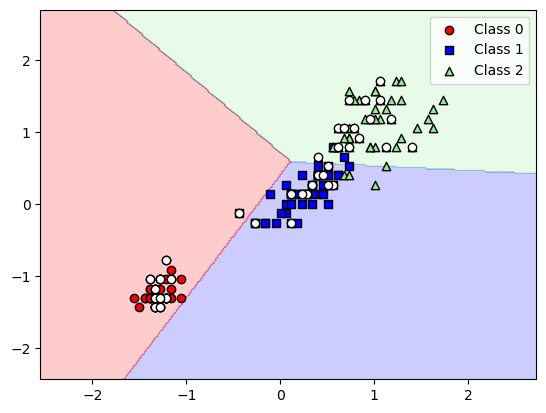

In [16]:
# Visualization
# Provide the testing data together with the original data.
def plot_decision_regions2(X, y, classifier, resolution=0.02, X_test=None):
    # Create lists of markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # np.unique: find the unique elements of an array
    # The output y only has two possible values, 0 and 1. Therefore np.unique(y) is 2.
    # Then colors[:len(np.unique(y))] is colors[:2], i.e., colors = ('red', 'blue')
    # This is suitable for discrete colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Set the range 
    # The range of the figure is larger than the range of the features.
    # Prevent data points from lying on the edges of the figure.
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 
    # Generate meshgrid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # np.ravel(): flatten an array. It returns a 1D-array
    # The input of the function 'predict' is X. Each column of X corresponds to a feature.
    # Therefore, after raveling, we need to transpose the array.
    # lab: labels for all grid points
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # The output of 'predict' is a 1D-array. It is reshaped to have the same shape as xx1
    lab = lab.reshape(xx1.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # alpha: control the transparency
    ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
    
    # Plot training examples
    # enumerate: 
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=colors[idx], marker=markers[idx], label='Class {}'.format(cl), edgecolor="black")
    ax.legend()
    
    # Circle testing examples
    ax.scatter(x=X_test[:,0], y=X_test[:,1], alpha=1, c='white', marker='o', label='Test set', edgecolor="black")
    # The original codes in the book use unfilled circle for the testing data. But it is hard to see these circles.
    # Here, filled circles are used for the testing data. The color of these cicles is white.
        
plot_decision_regions2(sc.transform(X), y, classifier=ppn, X_test=X_test_std)